### Small Image Classification Using Convolutional Neural Network (CNN)

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#cifar10 image dataset will load from tensorflow keras datasets
#there has 32*32 RGB images X_
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

###### Here we see there are 50000 training images and 1000 test images

In [ ]:
X_train[0] #this will return a 3D array where the array will be 32,32,3

In [19]:
y_train[:5] #will produce a 2D array 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
#we don't need 2D array of y_train so we will convert it into 1D arrat
#here the 1st dimention is 10000 and to keep it as it is we have to pass -1
#in the 2nd dimention i don't want [6], instead i want only 6 so i will keep it blank
y_train=y_train.reshape(-1,) 

In [22]:
y_train[:5] #now it is 1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

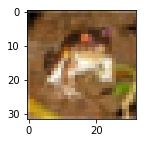

In [12]:
plt.figure(figsize= (15,2)) #this control the size of the image
plt.imshow(X_train[0]) #this will convert the 3D into image

In [15]:
#This function is take x and y as index and printing that particular image sample
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

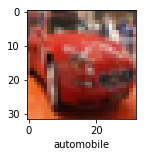

In [46]:
plot_sample(X_train,y_train,5)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

##### Normalizing the training data

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

##### Build simple artificial neural network for image classification

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.8126 - accuracy: 0.3553
Epoch 2/5
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.6235 - accuracy: 0.4246
Epoch 3/5
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.5425 - accuracy: 0.4532
Epoch 4/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.4829 - accuracy: 0.4780
Epoch 5/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.4337 - accuracy: 0.4956


In [ ]:
ann.evaluate(X_test,y_test)

At the end of 5 epochs, accuracy is at around 49% so we can say ANN is not performing good. 

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1000
           1       0.60      0.62      0.61      1000
           2       0.46      0.26      0.34      1000
           3       0.34      0.37      0.36      1000
           4       0.50      0.36      0.42      1000
           5       0.36      0.43      0.39      1000
           6       0.57      0.54      0.55      1000
           7       0.51      0.61      0.56      1000
           8       0.51      0.72      0.60      1000
           9       0.52      0.61      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



##### Now let us build a convolutional neural network to train our images

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #softmax always make sum of the output probability =1


])

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.4469 - accuracy: 0.4822
Epoch 2/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 1.0927 - accuracy: 0.6156
Epoch 3/10
50000/50000 [==============================] - 130s 3ms/sample - loss: 0.9638 - accuracy: 0.6654
Epoch 4/10
50000/50000 [==============================] - 139s 3ms/sample - loss: 0.8798 - accuracy: 0.6956
Epoch 5/10
50000/50000 [==============================] - 154s 3ms/sample - loss: 0.8116 - accuracy: 0.7171
Epoch 6/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 0.7534 - accuracy: 0.7394
Epoch 7/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 0.7068 - accuracy: 0.7546
Epoch 8/10
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.6638 - accuracy: 0.7686
Epoch 9/10
50000/50000 [==============================] - 423s 8ms/sample - loss: 0.6237 - accuracy: 0.7813
Epoch

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [32]:
cnn.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9061699753761292, 0.7023]

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.93884135e-05, 4.59849389e-06, 1.43158680e-03, 7.70511389e-01,
        3.07700218e-04, 2.24548057e-01, 2.83811387e-04, 1.09706612e-04,
        2.70745996e-03, 6.33721174e-06],
       [2.30034435e-04, 4.49410034e-03, 1.73248623e-06, 1.82615523e-07,
        1.03578124e-09, 1.12136367e-09, 1.03927164e-07, 2.98294757e-11,
        9.95265365e-01, 8.55844883e-06],
       [3.49978656e-02, 3.55490856e-02, 2.15152418e-03, 3.48920636e-02,
        8.89095478e-03, 3.63567541e-03, 2.03437550e-04, 1.46757215e-02,
        1.35073051e-01, 7.29930639e-01],
       [6.28789246e-01, 4.85398807e-03, 1.84729137e-02, 1.91144319e-03,
        6.88960357e-03, 3.31645628e-04, 3.41561716e-03, 4.05898572e-05,
        3.34116042e-01, 1.17883307e-03],
       [8.13760607e-07, 5.21850325e-06, 1.85500570e-02, 1.78159028e-02,
        9.89451483e-02, 1.17232837e-03, 8.63475025e-01, 2.05812248e-05,
        1.17645595e-05, 3.09982534e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 9, 0, 6]

In [37]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [48]:
y_test=y_test.reshape(-1,)

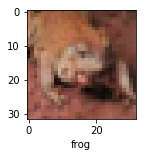

In [49]:
plot_sample(X_test,y_test,5)

In [50]:
classes[y_classes[3]]

'airplane'

In [51]:
classes[y_classes[3]]

'airplane'